In [1]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from os import path

In [2]:
train_folder = "C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset/F19_Release_Train_06-28-21/Train"

In [3]:
#Snippet from "naive_model.ipynb". 
#Defining the path and semester
semester = 'S19'
BASE_PATH = os.path.join('C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset', 'F19_Release_Train_06-28-21')
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')

In [7]:
#Setting up a ProgSnap2 Dataset (this is the data format used in the Challenge.)
train_ps2 = ProgSnap2Dataset(os.path.join(TRAIN_PATH, 'Data')) 

## Event Analysis

In [12]:
#Table of all Course Events
events = train_ps2.get_main_table()
events

,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,Order,ParentEventID
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Run.Program,1.000000,NaN,NaN,NaN,179362,179362,NaN
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Compile,NaN,Success,NaN,NaN,179363,179363,179362.0
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Run.Program,1.000000,NaN,NaN,NaN,179364,179364,NaN
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Compile,NaN,Success,NaN,NaN,179365,179365,179364.0
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:00:06,0,CS 1,439,5,1b38c7b1c7ebca281bbbc270d1b896484de663045c715f...,True,Run.Program,1.000000,NaN,NaN,NaN,179358,179358,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262377,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:25:42,0,CS 1,502,112,add860149e169c4e0ef359e8523a475bff1cb35185d799...,True,Compile,NaN,Success,NaN,NaN,458825,458825,458824.0
262378,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Run.Program,0.909091,NaN,NaN,NaN,458826,458826,NaN
262379,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Compile,NaN,Success,NaN,NaN,458827,458827,458826.0
262380,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:51,0,CS 1,502,118,38e11aa1c182ae86953bcf1b435fd1a7e9decdb7434aee...,True,Run.Program,1.000000,NaN,NaN,NaN,458828,458828,NaN


In [16]:
#Are there different Courses?
events["CourseID"].value_counts()
#no

CS 1    262398
Name: CourseID, dtype: int64

In [17]:
#Which Events aere in the Data?
events["EventType"].value_counts(dropna=False)

Run.Program      91751
Compile          91751
Compile.Error    78896
Name: EventType, dtype: int64

In [21]:
#How many and which Assignments and Tasks do we have in the Data?
events["ProblemID"].groupby(events["AssignmentID"]).value_counts()

AssignmentID  ProblemID
439           13           13346
              232           9906
              236           6099
              3             4976
              233           4565
              5             3924
              234           3856
              235           3794
              1             2514
              12            1898
487           102          11974
              101          11597
              24            8143
              25            7186
              100           6034
              28            5481
              22            3850
              20            3322
              21            2534
              17            1978
492           40            9224
              32            9014
              38            8798
              34            7789
              128           6801
              33            5497
              39            4834
              36            4825
              37            4513
              31   

In [22]:
#Which scores can one get?
events["Score"].value_counts(dropna=False)
#Everything between 0 and 1. 
#Question: How is the Score derived?

NaN         170647
0.000000     39730
1.000000     18279
0.500000      1042
0.272727       978
             ...  
0.678571         1
0.535714         1
0.347826         1
0.173913         1
0.217391         1
Name: Score, Length: 212, dtype: int64

In [26]:
#How many students do we have?
len(events["SubjectID"].unique())

367

## Overview of Task-Performance

In [24]:
early = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,1,1,True,True
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,3,1,True,True
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,5,1,True,True
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,12,1,True,True
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,13,1,True,True
...,...,...,...,...,...,...
10652,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,37,1,True,True
10653,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,38,8,True,True
10654,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,39,3,True,True
10655,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,40,8,False,False


(array([7.940e+03, 1.318e+03, 6.840e+02, 2.840e+02, 1.900e+02, 8.800e+01,
        5.500e+01, 2.700e+01, 2.000e+01, 1.000e+01, 1.100e+01, 1.300e+01,
        4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00]),
 array([  1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,  39.5,  45. ,
         50.5,  56. ,  61.5,  67. ,  72.5,  78. ,  83.5,  89. ,  94.5,
        100. , 105.5, 111. ]),
 <BarContainer object of 20 artists>)

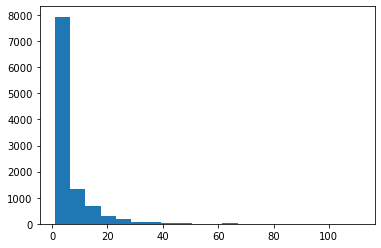

In [28]:
#How is the number of attempts in early set distributed?
plt.hist(early["Attempts"], bins=20)
#Probably Poisson-Distribution

In [32]:
#How is the Label distributed?
early["Label"].value_counts()

True     7942
False    2715
Name: Label, dtype: int64

In [35]:
#Are ther very difficult exercise?
early["Label"].groupby([early["AssignmentID"], early["ProblemID"]]).value_counts()
#Not so much by definition of the Label

AssignmentID  ProblemID  Label
439           1          True     302
                         False     58
              3          True     276
                         False     83
              5          True     282
                         False     80
              12         True     284
                         False     75
              13         True     280
                         False     85
              232        True     284
                         False     78
              233        True     273
                         False     87
              234        True     283
                         False     79
              235        True     275
                         False     87
              236        True     274
                         False     88
487           17         True     277
                         False     74
              20         True     286
                         False     65
              21         True     281
                   

In [36]:
#How often do Correct Eventually and Label differ?
(early["CorrectEventually"] == early["Label"]).value_counts()
#The Label is unequal to Correct Eventually, if the respondend needed more Attenpts than 75% of her peers. 

True     8569
False    2088
dtype: int64

## Subject Level DF

In [76]:
#Function from "naive_model.ipynb"
#Changed to use subject_id
def extract_instance_features(subject_id, early_df):
    instance = pd.DataFrame(data=[subject_id], columns=["SubjectID"])
    early_problems = early_df[early_df["SubjectID"] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    #instance = instance.drop('SubjectID')
    instance['PercLabelledTrue'] = np.mean(early_problems["Label"] == 1)
    return instance

In [77]:
extract_instance_features(early["SubjectID"][10], early)

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333


In [78]:
def make_subject_df(task_level_data):
    subjects = task_level_data["SubjectID"].unique()
    subject_df = pd.DataFrame(columns=["SubjectID", "ProblemsAttempted", "PercCorrectEventually", "MedAttempts", "MaxAttempts", "PercCorrectFirstTry", "PercLabelledTrue"])
    for subject in subjects:
        instance_data = extract_instance_features(subject, task_level_data)
        subject_df = subject_df.append(instance_data)
    return(subject_df)


In [79]:
subject_df = make_subject_df(early)
subject_df

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333
0,01e96e066eff2e82627dac0493737be2de9bd2f50d6d49...,20,0.750000,4.0,15,0.300000,0.650000
0,03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b0...,30,0.966667,3.0,45,0.333333,0.766667
0,0461c96c9cc0058f709704605f24136f373ba4e9ac083a...,29,0.896552,6.0,22,0.103448,0.517241
0,048fce7bd5670d2ce6215f41856aea059973fb280ce106...,30,1.000000,3.5,26,0.333333,0.833333
...,...,...,...,...,...,...,...
0,fe545219144abfb405c64d3fed4f32dc348ece7afb0a81...,30,1.000000,2.0,26,0.466667,0.900000
0,ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b53...,30,1.000000,4.0,38,0.266667,0.633333
0,ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4...,30,0.933333,3.5,34,0.233333,0.800000
0,ff86d28801139f82f29ac25c715647674d50977478b8d8...,30,1.000000,3.0,31,0.266667,0.866667


In [66]:
#What is the percent of Average correct Answers 
np.mean(subject_df["PercCorrectEventually"])

0.9371397887907342

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          4.,   4.,   3.,   2.,  13.,  25.,  16.,  56., 240.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

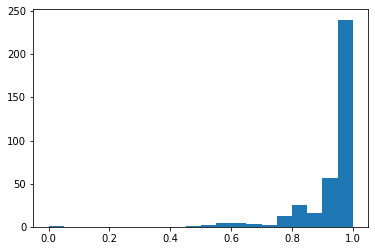

In [68]:
plt.hist(subject_df["PercCorrectEventually"], bins=20)

In [69]:
#What is the Average of correct Anwer on first try?
np.mean(subject_df["PercCorrectFirstTry"])

0.31904243814476974

(array([26., 81., 89., 67., 34., 21., 21., 12.,  9.,  7.]),
 array([0.        , 0.09666667, 0.19333333, 0.29      , 0.38666667,
        0.48333333, 0.58      , 0.67666667, 0.77333333, 0.87      ,
        0.96666667]),
 <BarContainer object of 10 artists>)

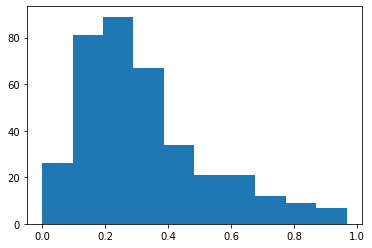

In [72]:
plt.hist(subject_df["PercCorrectFirstTry"])

In [80]:
#What is teh Average of being labelled as True?
np.mean(subject_df["PercLabelledTrue"])

0.7423874802013036

(array([ 1.,  3.,  2.,  5., 18., 52., 65., 51., 79., 91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

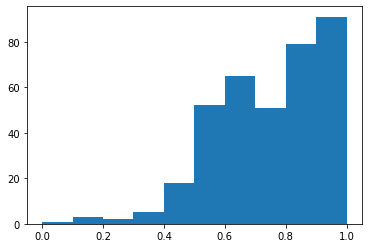

In [81]:
plt.hist(subject_df["PercLabelledTrue"])
#Es scheint hier durchaus viel Varianz zu geben!